Comenzamos importando las herramientas que ultilizaremos para el analísis, buscamos  ver el comportamiento de las plataformas de aprendizaje y demás herramientas para estudiar data science y ML y quienes muestran la mayor participacion en el uso de las mismas.

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import plotly.express as px
import bs4
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

Ahora importamos el csv de Kaggle ML and Data Science survey del año 2022 con las preguntas de interés

In [3]:
df=pd.read_csv("kaggle survey 2022 responses.csv").iloc[1:]
df = df.reset_index()
analysis_df = df[['Q4','Q5', 
    'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 
    'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7',
    
    ]]

/var/folders/hc/lp1h6rkj7d72hgvshkxlz2440000gn/T/ipykernel_1362/1659147414.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("kaggle survey 2022 responses.csv").iloc[1:]


Aislamos solo los paises de latinoamérica del resto del mundo, los paises que participaron en la encuesta fueron: Argentina, Brasil, Colombia, Chile, Ecuador, México y Perú.

In [4]:
paises_latinoamerica = analysis_df[analysis_df['Q4'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Mexico',  'Peru'])]
paises_latinoamerica


,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,...,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
15,Mexico,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None / I do not study data science,NaN
23,Argentina,Yes,Coursera,NaN,NaN,NaN,NaN,NaN,Udemy,LinkedIn Learning,...,NaN,NaN,NaN,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)",NaN,NaN,Other
25,Brazil,No,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,...,University Courses (resulting in a university ...,NaN,NaN,NaN,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
27,Argentina,No,Coursera,edX,NaN,NaN,NaN,NaN,Udemy,NaN,...,University Courses (resulting in a university ...,NaN,NaN,University courses,"Online courses (Coursera, EdX, etc)",NaN,NaN,NaN,NaN,NaN
29,Chile,No,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,...,University Courses (resulting in a university ...,NaN,Other,University courses,NaN,NaN,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,Brazil,Yes,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,...,NaN,NaN,Other,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,Other
23959,Brazil,Yes,Coursera,edX,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
23962,Brazil,Yes,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,LinkedIn Learning,...,University Courses (resulting in a university ...,NaN,NaN,University courses,NaN,"Social media platforms (Reddit, Twitter, etc)",NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
23963,Colombia,No,Coursera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN


Ahora calcularemos que porcentaje de los datos representa latinoamérica con respecto al resto del mundo según nuestro DF de partida.
A continuación graficaremos para representar esta proporción

In [5]:
count_total = len(analysis_df)
count_latam = len(paises_latinoamerica)
print(count_total)
print(count_latam)


23997
1963


creamos gráfico de pastel

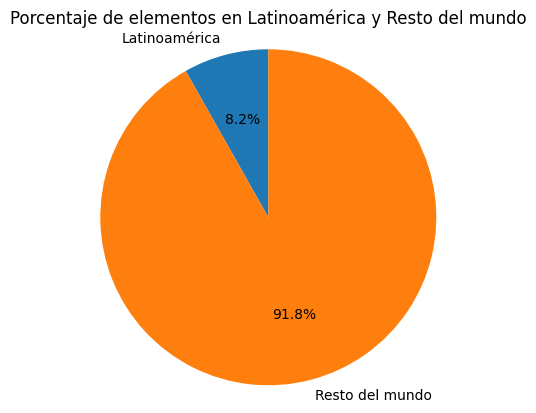

In [6]:


labels = ['Latinoamérica', 'Resto del mundo']
sizes = [count_latam, count_total - count_latam]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de elementos en Latinoamérica y Resto del mundo')

plt.axis('equal') 
plt.show()


Como se podrá observar, latinoamerica representa el 8.2% de los participantes en la encuesta de Kaggle.

Ahora queremos calcular quienes el latino america son estudiantes y quienes no se consideran así, veremos si no hay valores nulos o nan y graficaremos su proporción

In [7]:
q5a=paises_latinoamerica[['Q4','Q5']]
q5a=q5a.rename(columns={'Q4':'País'})
q5a=q5a.rename(columns={'Q5':'Estudiante'})
q5a.describe()

,País,Estudiante
count,1963,1963
unique,7,2
top,Brazil,Yes
freq,833,1039


In [8]:


# Separar los valores "No" de la columna "Estudiante" por país
no_estudiantes = q5a[q5a['Estudiante'] == 'No']
no_estudiantes_counts = no_estudiantes.groupby('País').size()

# Separar los valores "Yes" de la columna "Estudiante" por país
estudiantes = q5a[q5a['Estudiante'] == 'Yes']
estudiantes_counts = estudiantes.groupby('País').size()

# Crear el gráfico de mapa para los no estudiantes
fig_no_estudiantes = go.Figure(data=go.Choropleth(
    locations=no_estudiantes_counts.index,
    z=no_estudiantes_counts,
    locationmode='country names',
    colorscale='Blues',
    colorbar_title='No Estudiantes',
))

# Crear el gráfico de mapa para los estudiantes
fig_estudiantes = go.Figure(data=go.Choropleth(
    locations=estudiantes_counts.index,
    z=estudiantes_counts,
    locationmode='country names',
    colorscale='Oranges',
    colorbar_title='Estudiantes',
))

# Configurar el diseño y las características del gráfico
fig_no_estudiantes.update_layout(
    title_text='Distribución de No Estudiantes por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_estudiantes.update_layout(
    title_text='Distribución de Estudiantes por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Mostrar los gráficos de mapa
fig_no_estudiantes.show()
fig_estudiantes.show()


In [9]:
q5=paises_latinoamerica["Q5"]
q5.describe()

count     1963
unique       2
top        Yes
freq      1039
Name: Q5, dtype: object

In [10]:
q5.isna().sum()

0

In [11]:
q5.isnull().sum()

0

In [12]:
q5_values = q5.value_counts().values
q5_labels = q5.value_counts().index

In [13]:
q5_df = pd.DataFrame({'Estudiantes': q5_labels, 'Cantidad': q5_values})
q5_df

,Estudiantes,Cantidad
0,Yes,1039
1,No,924


La tendencia indica que hay una ligera mayoría de personas que son estudiantes de quienes no se consideran asi. ¿Esto se reflejará en el uso de plataformas  de aprendizaje?

In [14]:
alt.Chart(q5_df).mark_bar().encode(
    y= 'Cantidad',
    x= 'Estudiantes',
    color= alt.condition(
        alt.datum.Cantidad == 924,  
        alt.value('#6ab273'),     
        alt.value('#33693c')   
    )
).properties(width=200)

alt.Chart(...)

Ahora exploraremos que plataformas de estudio que se han utilizado según la encuesta y graficaremos las respuestas. ¿Serán únicamente plataformas digitales las que tengan la mayoria de respuestas?

In [15]:
q6 =paises_latinoamerica[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12']]

In [16]:
q6_counts = []
q6_labels = []

for _ in q6:
    
    q6_counts.append(q6[_].value_counts().values[0])
    q6_labels.append(q6[_].value_counts().index[0])
    
q6_df = pd.DataFrame({'Plataformas': q6_labels, 'Encuestados': q6_counts})
q6_df

,Plataformas,Encuestados
0,Coursera,851
1,edX,298
2,Kaggle Learn Courses,562
3,DataCamp,333
4,Fast.ai,43
5,Udacity,201
6,Udemy,711
7,LinkedIn Learning,248
8,"Cloud-certification programs (direct from AWS,...",178
9,University Courses (resulting in a university ...,583


In [17]:
alt.Chart(q6_df).mark_bar().encode(
    x='Plataformas',
    y='Encuestados',
        color=alt.condition(
        alt.datum.Encuestados > 711,  
        alt.value('#33693c'),     
        alt.value('#6ab273')   
    )
).properties(width=600)

alt.Chart(...)

Podemos Observar que las plataformas digitales son las más utilizadas resaltando  la de Coursera, cabe mencionar que los cursos que dan las universidades tienen números similares a plataformas como kaggle.

Ahora veremos un grafico comparando únicamente plataformas digitales

In [18]:
q6[q6['Q6_10'] != 'University Courses (resulting in a university degree)'].shape


(1380, 12)

In [19]:
q6_wuni = q6[q6['Q6_10'] != 'University Courses (resulting in a university degree)']
q6_wuni.describe(include='all')

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
count,588,206,388,234,21,120,502,165,104,0,171,396
unique,1,1,1,1,1,1,1,1,1,0,1,1
top,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",NaN,None,Other
freq,588,206,388,234,21,120,502,165,104,NaN,171,396


In [20]:
q6_wuni_df = pd.DataFrame({'Plataformas': q6_wuni.describe(include='all').loc['top'].values, 'Encuestados': q6_wuni.describe(include='all').loc['freq'].values})
q6_wuni_df.dropna(inplace=True)
q6_wuni_df

,Plataformas,Encuestados
0,Coursera,588
1,edX,206
2,Kaggle Learn Courses,388
3,DataCamp,234
4,Fast.ai,21
5,Udacity,120
6,Udemy,502
7,LinkedIn Learning,165
8,"Cloud-certification programs (direct from AWS,...",104
10,None,171


In [21]:
alt.Chart(q6_wuni_df).mark_bar().encode(
    x='Plataformas',
    y='Encuestados',
        color=alt.condition(
        alt.datum.Encuestados > 502,  
        alt.value('#33693c'),     
        alt.value('#6ab273')   
    )
).properties(width=600)

alt.Chart(...)

Coursera es la mayor plataforma para estudiar DS y ML en Latinoamerica

Ahora exploraremos que herramientas incluidas las plataformas digitales se usan en latam para aprender DS y ML

In [22]:
q7 = paises_latinoamerica[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']]
q7.describe(include='all')

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
count,637,1289,272,1144,1062,57,141
unique,1,1,1,1,1,1,1
top,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other
freq,637,1289,272,1144,1062,57,141


In [23]:
q7_values = q7.describe(include='all').loc['freq']
q7_labels = q7.describe(include='all').loc['top']

q7_df = pd.DataFrame({'Métodos': q7_labels, 'Encuestados': q7_values})
q7_df

,Métodos,Encuestados
Q7_1,University courses,637
Q7_2,"Online courses (Coursera, EdX, etc)",1289
Q7_3,"Social media platforms (Reddit, Twitter, etc)",272
Q7_4,"Video platforms (YouTube, Twitch, etc)",1144
Q7_5,"Kaggle (notebooks, competitions, etc)",1062
Q7_6,None / I do not study data science,57
Q7_7,Other,141


In [24]:
alt.Chart(q7_df).mark_bar().encode(
    x='Métodos',
    y='Encuestados',
        color=alt.condition(
        alt.datum.Encuestados > 1144,  
        alt.value('#33693c'),     
        alt.value('#6ab273')   
    )
).properties(width=600)

alt.Chart(...)

como podemos observar los plataformas online son la herramienta más usada en latam, seguida de plataformas de video y por ultimo la web de Kaggle.

Ahora exploraremos  esta misma pregunta  con respecto a los paises de México y Brasil y graficaremos.

In [25]:
q7a=paises_latinoamerica[['Q4','Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']]


In [26]:
MB_df=q7a[q7a['Q4'].isin(['Mexico','Brazil'])]


In [27]:
count_total2 = len(q7a)
count_MB = len(MB_df)
print(count_total2)
print(count_MB)


1963
1213


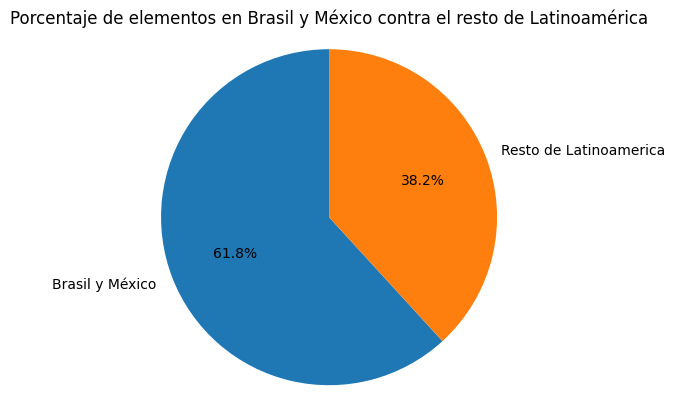

In [28]:


labels = ['Brasil y México', 'Resto de Latinoamerica']
sizes = [count_MB, count_total2 - count_MB]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de elementos en Brasil y México contra el resto de Latinoamérica')

plt.axis('equal') 
plt.show()


Brasil y México son la mayoría de respuestas en latinoamérica de la pregunta Q7 de sobre el uso de herramientas para el estudio de DS Y ML

Ahora exploraremos la proporcion que tienen Brasil y Mexico del uso de herramientas para el estudio de DS y ML

In [29]:
Mexico=q7a[q7a['Q4'].isin(['Mexico'])]
Mexico.describe(include='all')

,Q4,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
count,380,110,257,69,230,202,13,14
unique,1,1,1,1,1,1,1,1
top,Mexico,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other
freq,380,110,257,69,230,202,13,14


In [30]:
Mexico_values = Mexico.describe(include='all').loc['freq']
Mexico_labels = Mexico.describe(include='all').loc['top']

Mexico_df = pd.DataFrame({'Métodos': Mexico_labels, 'Encuestados': Mexico_values})
Mexico_df

,Métodos,Encuestados
Q4,Mexico,380
Q7_1,University courses,110
Q7_2,"Online courses (Coursera, EdX, etc)",257
Q7_3,"Social media platforms (Reddit, Twitter, etc)",69
Q7_4,"Video platforms (YouTube, Twitch, etc)",230
Q7_5,"Kaggle (notebooks, competitions, etc)",202
Q7_6,None / I do not study data science,13
Q7_7,Other,14


In [31]:
Brazil=q7a[q7a['Q4'].isin(['Brazil'])]
Brazil.describe(include='all')

,Q4,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
count,833,261,547,107,492,474,26,66
unique,1,1,1,1,1,1,1,1
top,Brazil,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other
freq,833,261,547,107,492,474,26,66


In [32]:
Brazil_values = Brazil.describe(include='all').loc['freq']
Brazil_labels = Brazil.describe(include='all').loc['top']

Brazil_df = pd.DataFrame({'Métodos': Brazil_labels, 'Encuestados': Brazil_values})
Brazil_df

,Métodos,Encuestados
Q4,Brazil,833
Q7_1,University courses,261
Q7_2,"Online courses (Coursera, EdX, etc)",547
Q7_3,"Social media platforms (Reddit, Twitter, etc)",107
Q7_4,"Video platforms (YouTube, Twitch, etc)",492
Q7_5,"Kaggle (notebooks, competitions, etc)",474
Q7_6,None / I do not study data science,26
Q7_7,Other,66


In [33]:
Mexico=Mexico.rename(columns={'Q4':'País'})
Brazil=Brazil.rename(columns={'Q4':'País'})

In [34]:
df_melted1 = pd.melt(Mexico, id_vars='País', value_vars=['Q7_1', 'Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7'])
df_melted1

,País,variable,value
0,Mexico,Q7_1,NaN
1,Mexico,Q7_1,NaN
2,Mexico,Q7_1,NaN
3,Mexico,Q7_1,NaN
4,Mexico,Q7_1,NaN
...,...,...,...
2655,Mexico,Q7_7,NaN
2656,Mexico,Q7_7,Other
2657,Mexico,Q7_7,NaN
2658,Mexico,Q7_7,NaN


In [35]:
df_melted2 = pd.melt(Brazil, id_vars='País', value_vars=['Q7_1', 'Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7'])
df_melted2

,País,variable,value
0,Brazil,Q7_1,NaN
1,Brazil,Q7_1,NaN
2,Brazil,Q7_1,NaN
3,Brazil,Q7_1,NaN
4,Brazil,Q7_1,NaN
...,...,...,...
5826,Brazil,Q7_7,NaN
5827,Brazil,Q7_7,NaN
5828,Brazil,Q7_7,Other
5829,Brazil,Q7_7,NaN


Ahora graficaremos los resultados

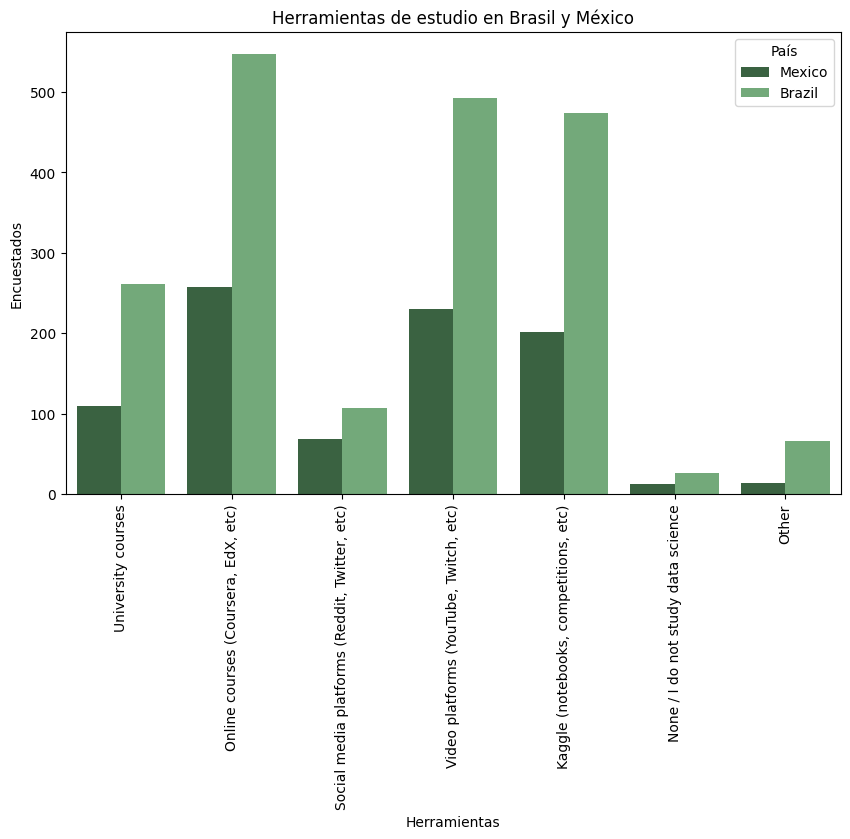

In [36]:


# Combinar los DataFrames
df_combined = pd.concat([df_melted1, df_melted2])

# Definir los nombres de los resultados de las columnas Q
nombres_resultados = [
    'University courses',
    'Online courses (Coursera, EdX, etc)',
    'Social media platforms (Reddit, Twitter, etc)',
    'Video platforms (YouTube, Twitch, etc)',
    'Kaggle (notebooks, competitions, etc)',
    'None / I do not study data science',
    'Other'
]

# Definir los códigos hexadecimales de color para cada país
colores_paises = {
    'Brazil': '#6ab273',
    'Mexico': '#33693c'
    
}

# Graficar los valores agrupados
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Configurar las barras agrupadas utilizando Seaborn y los colores específicos de cada país
sns.set_palette([colores_paises.get(pais, '#808080') for pais in df_combined['País'].unique()])
sns.countplot(x='value', hue='País', data=df_combined, order=nombres_resultados)

plt.xlabel('Herramientas')
plt.ylabel('Encuestados')
plt.title('Herramientas de estudio en Brasil y México')
plt.xticks(rotation=90)
plt.legend(title='País')
plt.show()


Podemos observar que los cursos online son los más usados en estos dos países, sin dejar atrás las plataformas de video y la web de Kaggle